In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings
%pylab inline
%load_ext autoreload
%autoreload 2
df = pd.read_csv('df.csv')
df["REPDTE"] = pd.to_datetime(df["REPDTE"], format="%Y-%m-%d").dt.date

Populating the interactive namespace from numpy and matplotlib


In [3]:
from helper import *

In [4]:
def banksShow(date):
    variables = ["Total Assets", "Securities", "Held to Maturity (Book Value)"]
    varCode = ["NAMEFULL"] + [name2code[name] for name in variables]
    df_2022_12 = df[df['REPDTE'] == date][varCode][:100]
    df_2022_12.columns = ["Bank"] + variables
    df_2022_12["Held to Maturity (Book Value)"] = df_2022_12["Held to Maturity (Book Value)"]/df_2022_12["Securities"]
    df_2022_12["Securities"] = df_2022_12["Securities"]/df_2022_12["Total Assets"]
    df_2022_12["Total Assets"] = df_2022_12["Total Assets"]/10**6
    dd = df_2022_12.sort_values(by=['Held to Maturity (Book Value)'],ascending=False).head(5).round(3).drop("Securities",axis=1).reset_index(drop=True)
    dd.index += 1
    print(dd.to_latex())

    dd = df_2022_12.sort_values(by=["Securities"],ascending=False).head(5).round(3).drop("Held to Maturity (Book Value)",axis=1).reset_index(drop=True)
    dd.index += 1
    print(dd.to_latex())
    
    return df_2022_12

In [5]:
df_2022_3 = banksShow(datetime.date(2022, 3, 31))
df_2023_3 = banksShow(datetime.date(2023, 3, 31))

\begin{tabular}{llrr}
\toprule
{} &                                   Bank &  Total Assets &  Held to Maturity (Book Value) \\
\midrule
1 &                        PROSPERITY BANK &        38.275 &                          0.969 \\
2 &                    FIRST REPUBLIC BANK &       187.121 &                          0.886 \\
3 &                    SILICON VALLEY BANK &       217.804 &                          0.792 \\
4 &                   VALLEY NATIONAL BANK &        43.421 &                          0.746 \\
5 &  BANK OF AMERICA, NATIONAL ASSOCIATION &      2513.619 &                          0.723 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrr}
\toprule
{} &                              Bank &  Total Assets &  Securities \\
\midrule
1 &  CHARLES SCHWAB PREMIER BANK, SSB &        40.705 &       0.840 \\
2 &          CHARLES SCHWAB BANK, SSB &       434.627 &       0.758 \\
3 &               SILICON VALLEY BANK &       217.804 &       0.572 \\
4 &         USAA FEDERAL SAVINGS BANK

/tmp/ipykernel_466849/323752516.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dd.to_latex())
/tmp/ipykernel_466849/323752516.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dd.to_latex())
/tmp/ipykernel_466849/323752516.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to

In [6]:
table1 = df_2023_3[["Securities", "Held to Maturity (Book Value)"]].describe().iloc[1:].round(3)

In [7]:
table2 = df_2022_3[["Securities", "Held to Maturity (Book Value)"]].describe().iloc[1:].round(3)

In [8]:
print(pd.merge(table1, table2, left_index=True, right_index=True, suffixes=(' March 2023', ' March 2022'))[[ "Held to Maturity (Book Value) March 2022", "Held to Maturity (Book Value) March 2023"]].to_latex())


\begin{tabular}{lrr}
\toprule
{} &  Held to Maturity (Book Value) March 2022 &  Held to Maturity (Book Value) March 2023 \\
\midrule
mean &                                     0.213 &                                     0.302 \\
std  &                                     0.232 &                                     0.274 \\
min  &                                     0.000 &                                     0.000 \\
25\%  &                                     0.000 &                                     0.007 \\
50\%  &                                     0.136 &                                     0.285 \\
75\%  &                                     0.355 &                                     0.508 \\
max  &                                     0.969 &                                     0.999 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_466849/4130863972.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.merge(table1, table2, left_index=True, right_index=True, suffixes=(' March 2023', ' March 2022'))[[ "Held to Maturity (Book Value) March 2022", "Held to Maturity (Book Value) March 2023"]].to_latex())


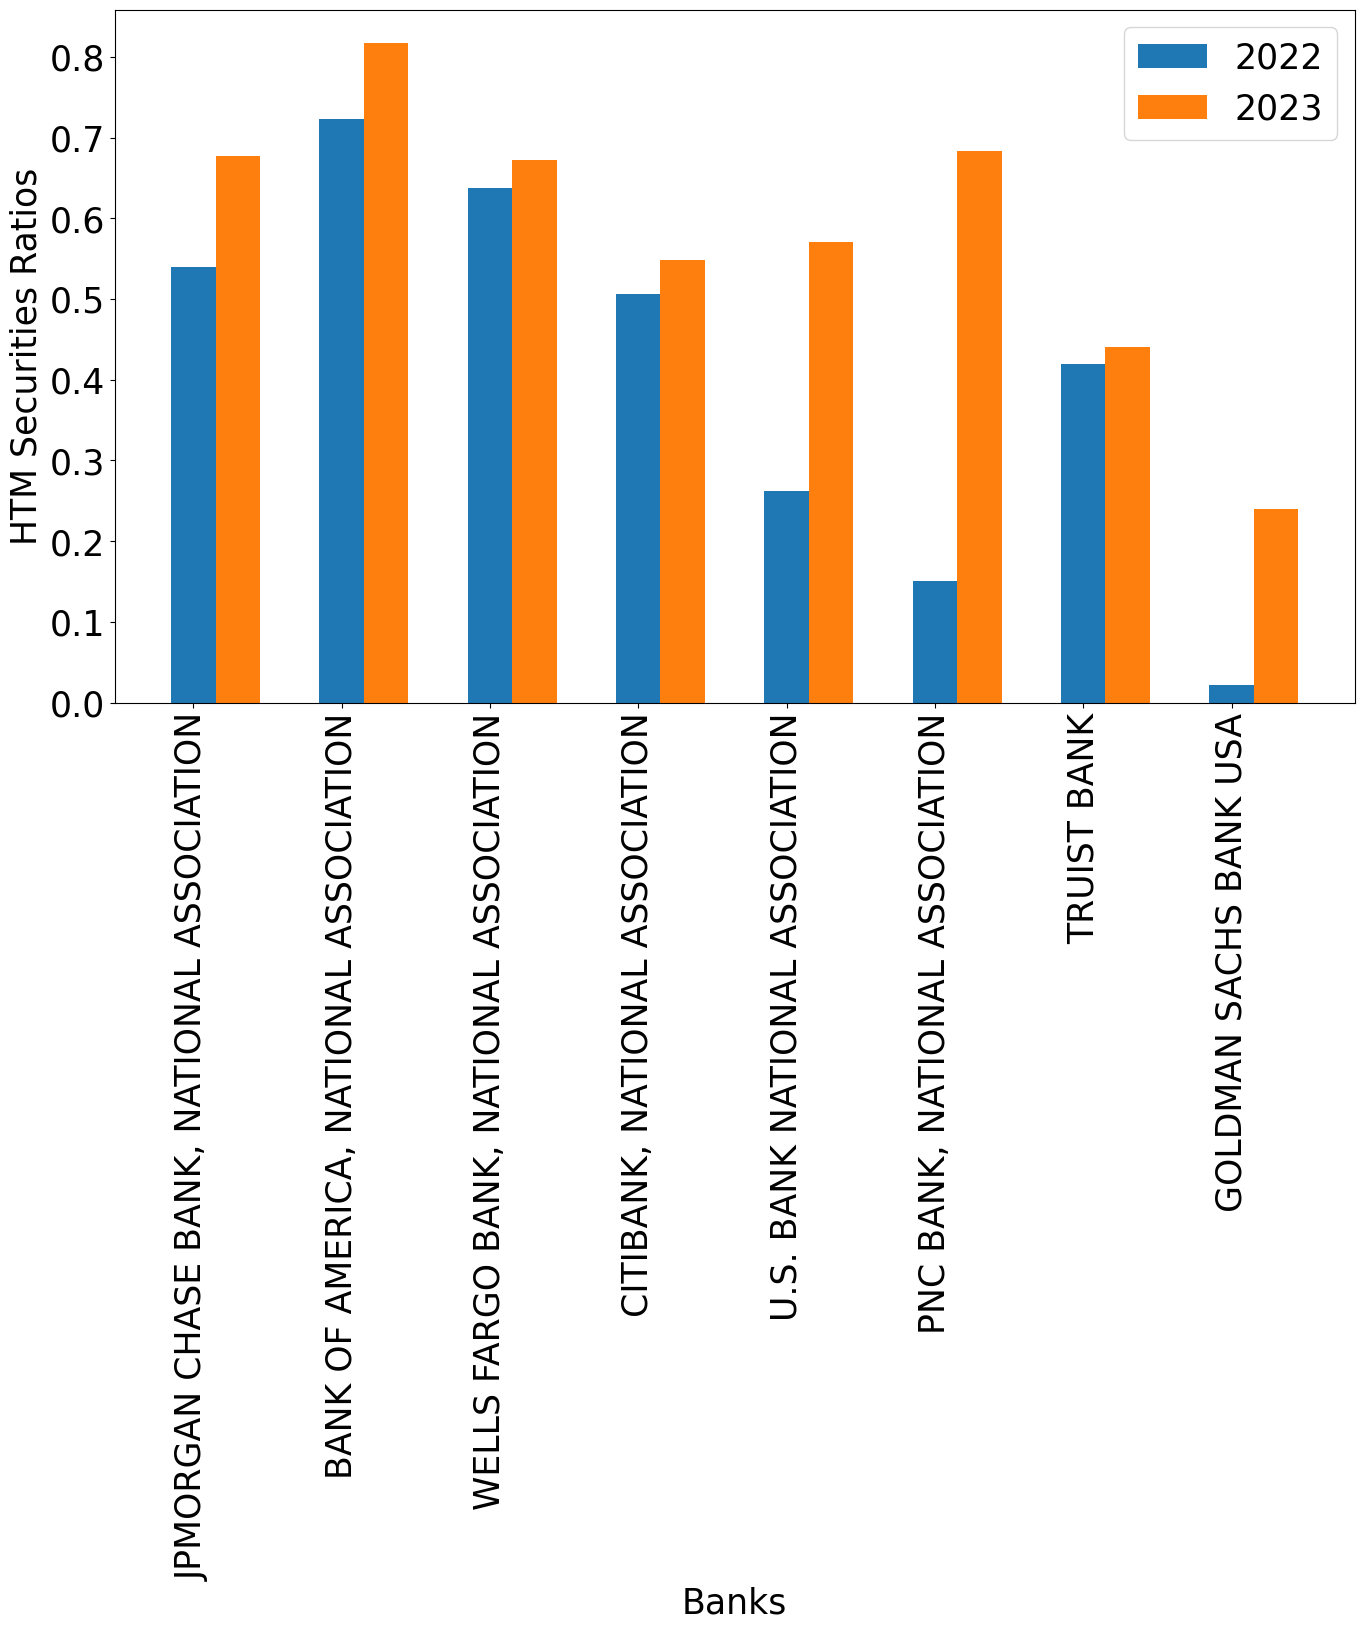

In [9]:
pylab.rcParams['figure.figsize'] = (16, 9)
pylab.rcParams['font.size'] = 25
d1,d2 = pairwiseComparison([2022,2023], [3,3], 9)

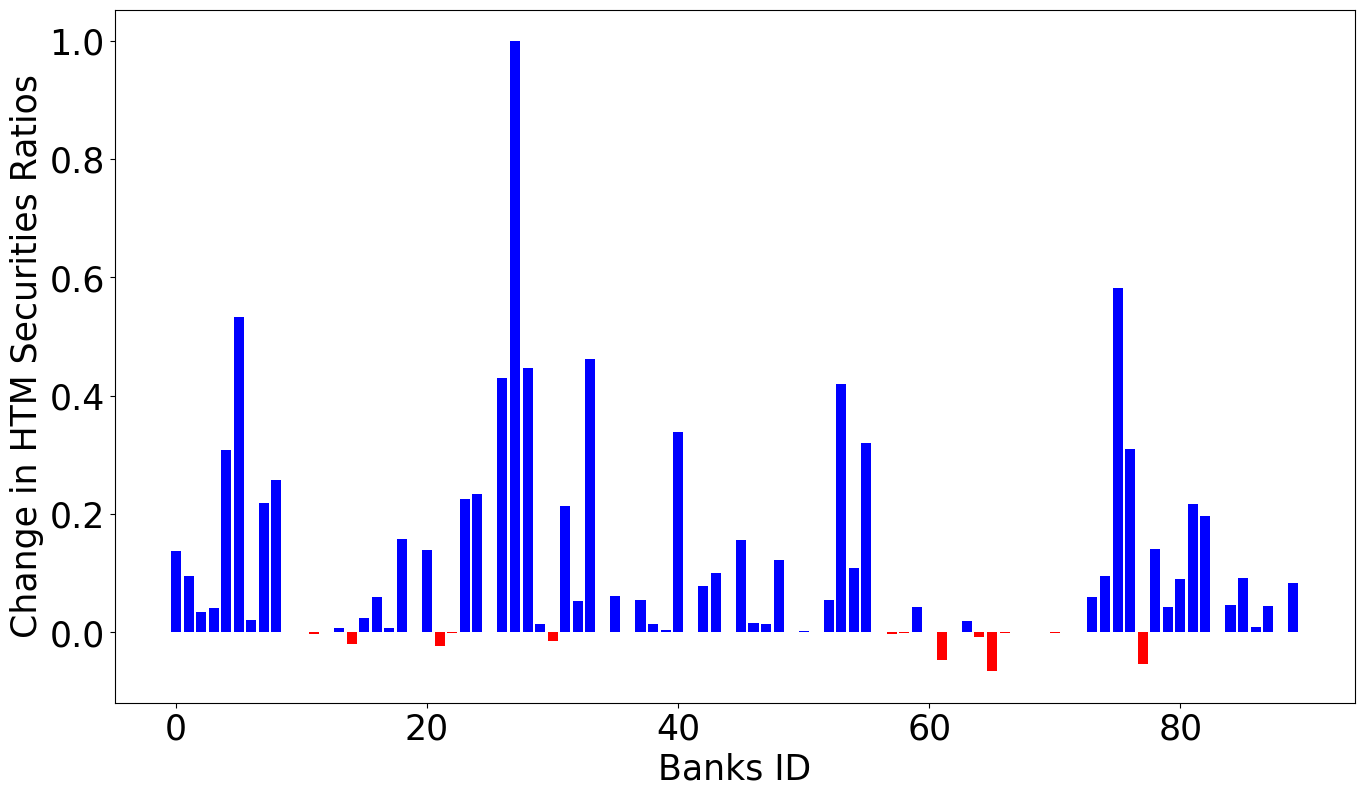

In [10]:
#plt.title("Change in Percentage of HTM holding from March 2022 to March 2023")
d1, d2 = pairwiseComparison([2022,2023], [3,3], 100, xlabel= False)

In [11]:
def varShow(date, variables = ["Total Assets", "Total Equity Capital"]):
    varCode = ["NAMEFULL"] + [name2code[name] for name in variables]
    df_2022_12 = df[df['REPDTE'] == date][varCode]
    df_2022_12.columns = ["Bank"] + variables
    return df_2022_12

In [12]:
def assetComparisonPlot(year1,year2):
    assets2001 = varShow(datetime.date(year1, 3, 31)).sort_values(by=["Total Assets"],ascending=False).head(20).reset_index(drop=True)["Total Assets"].values
    assets2023 = varShow(datetime.date(year2, 3, 31)).sort_values(by=["Total Assets"],ascending=False).head(20).reset_index(drop=True)["Total Assets"].values

    width = 0.30
    index = np.arange(len(assets2023))
    plt.bar(index, assets2001, width, label = str(year1))
    plt.bar(index+width, assets2023, width, label = str(year2))
    plt.xticks([])
    plt.xlabel("Top 20 Asset Holding Banks")
    plt.ylabel("Total Assets (in million)")
    plt.legend()

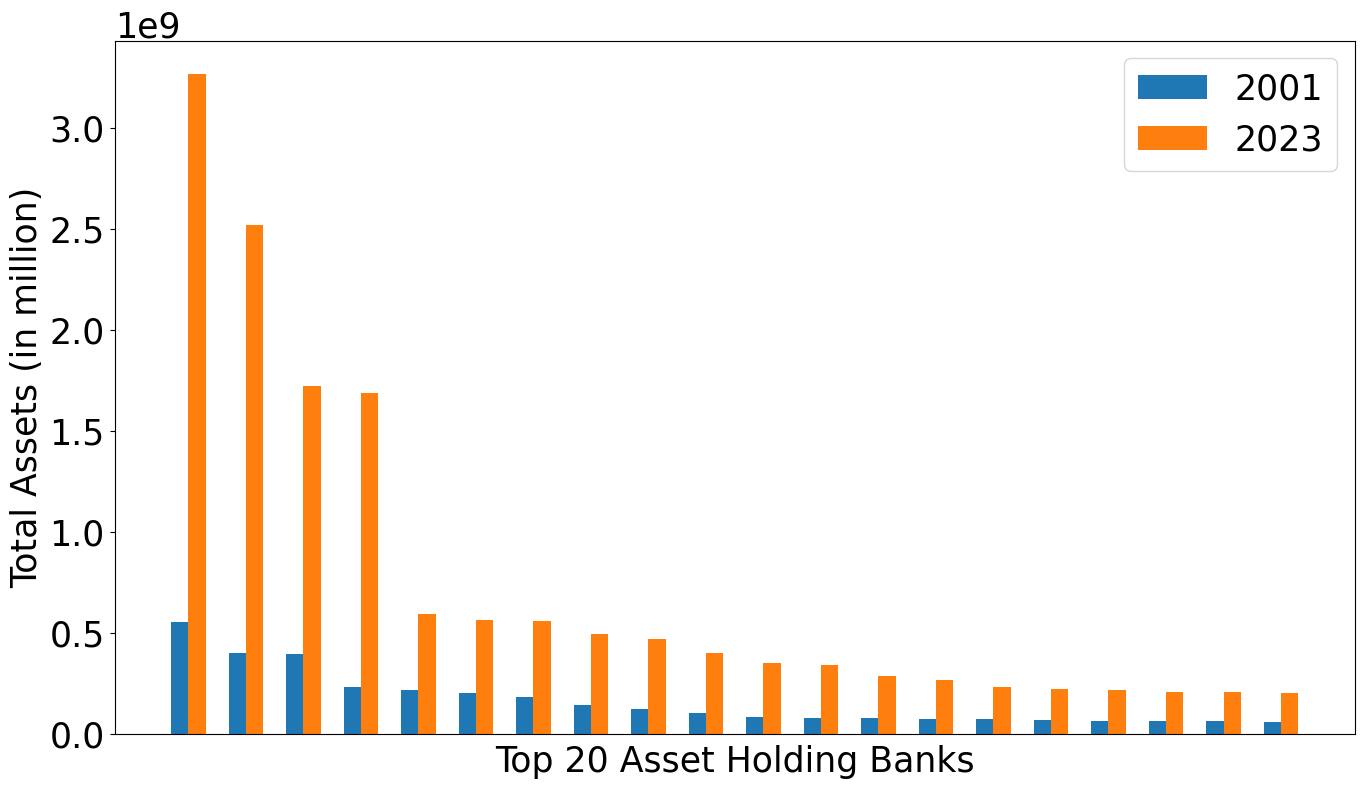

In [13]:
assetComparisonPlot(2001,2023)

[*********************100%***********************]  20 of 20 completed


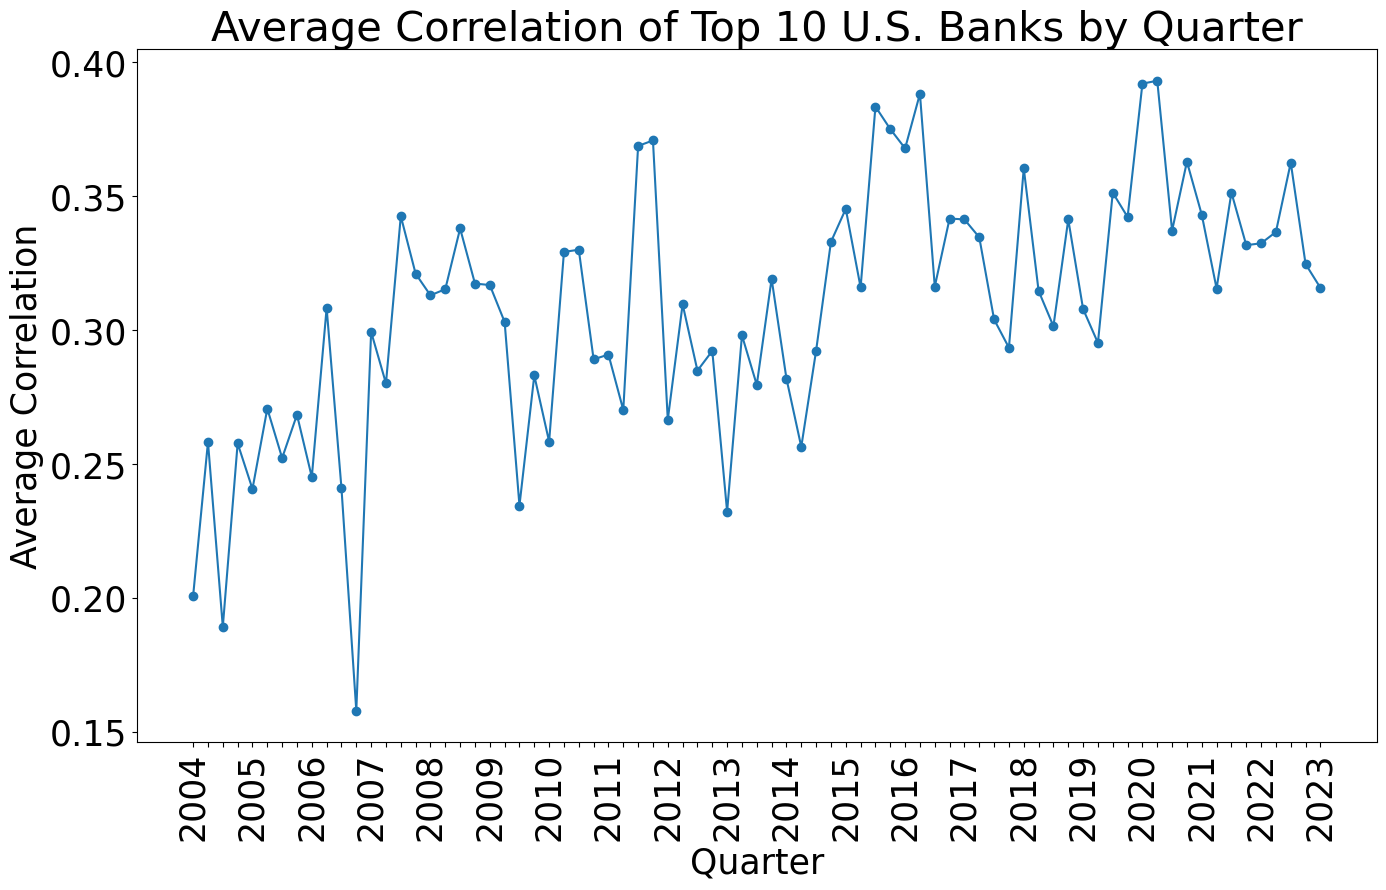

In [72]:
import yfinance as yf
import pandas as pd
import numpy as np

# Step 3: Choose the bank stocks and time frame
tickers = [
    'JPM',  # JPMorgan Chase & Co.
    'BAC',  # Bank of America Corp.
    'WFC',  # Wells Fargo & Co.
    'C',    # Citigroup Inc.
    'GS',   # Goldman Sachs Group Inc.
    'SCHW', # Charles Schwab Corp.
    'MS',   # Morgan Stanley
    'USB',  # U.S. Bancorp
    'PNC',  # PNC Financial Services Group Inc.
    'BK',   # The Bank of New York Mellon Corp.
    'STT',  # State Street Corp.
    'COF',  # Capital One Financial Corp.
    'FITB', # Fifth Third Bancorp
    'KEY',  # KeyCorp
    'NTRS', # Northern Trust Corp.
    'RF',   # Regions Financial Corp.
    'HBAN', # Huntington Bancshares Inc.
    'SBNY',   # Discover Financial Services
    'FRCB',   # First Republic Bank
    'SIVBQ'   # SVB Financial Group
]

legalNames = [
    "JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",
    "BANK OF AMERICA, NATIONAL ASSOCIATION",
    "WELLS FARGO BANK, NATIONAL ASSOCIATION",
    "CITIBANK, NATIONAL ASSOCIATION",
    "GOLDMAN SACHS BANK USA",
    "CHARLES SCHWAB BANK, SSB",
    "MORGAN STANLEY BANK, NATIONAL ASSOCIATION",
    "U.S. BANK NATIONAL ASSOCIATION",
    "PNC BANK, NATIONAL ASSOCIATION",
    "THE BANK OF NEW YORK MELLON",
    "STATE STREET BANK AND TRUST COMPANY",
    "CAPITAL ONE, NATIONAL ASSOCIATION",
    "FIFTH THIRD BANK, NATIONAL ASSOCIATION",
    "KEYBANK NATIONAL ASSOCIATION", 
    "THE NORTHERN TRUST COMPANY",
    "REGIONS BANK",
    "THE HUNTINGTON NATIONAL BANK",
    "SIGNATURE BANK",
    "FIRST REPUBLIC BANK",
    "SILICON VALLEY BANK"
]

t2l = dict(zip(tickers, legalNames))
l2t = dict(zip(legalNames, tickers))

def banksName(date, names):
    variables = ["Total Assets", "Securities", "Held to Maturity (Book Value)"]
    varCode = ["NAMEFULL"] + [name2code[name] for name in variables]
    df_2022_12 = df[df['REPDTE'] == date][varCode][:100]
    df_2022_12 = df_2022_12[df_2022_12["NAMEFULL"].isin(names)]
    df_2022_12.columns = ["Bank"] + variables
    df_2022_12["Held to Maturity (Book Value)"] = df_2022_12["Held to Maturity (Book Value)"]/df_2022_12["Securities"]
    df_2022_12["Securities"] = df_2022_12["Securities"]/df_2022_12["Total Assets"]
    df_2022_12["Total Assets"] = df_2022_12["Total Assets"]/10**6
    
    return df_2022_12

start_date = '2004-01-01'
end_date = '2023-03-31'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data.fillna(method='bfill', inplace=True)
daily_returns = data.pct_change().dropna()


# Initialize a list to hold the average correlations for each quarter
average_correlations = []

# Initialize a list to hold the labels for each quarter
quarters = []

# Group by quarter and calculate the correlation matrix for each group
for quarter, group in daily_returns.groupby(pd.Grouper(freq='Q')):
    # Calculate the weight matrix for this quarter
    d = banksName(quarter.date(), legalNames)["Total Assets"]
    banks = banksName(quarter.date(), legalNames)["Bank"]
    tickerOrder = [l2t[bank] for bank in banks]
    weight = d/d.sum()
    # Calculate the correlation matrix for this quarter
    corr_matrix = group[tickerOrder].corr() * np.outer(weight, weight) 
    # Get the upper triangle of the matrix, excluding the diagonal
    row_idx, col_idx = np.triu_indices(corr_matrix.shape[0], k=1)
    upper_triangle_values = corr_matrix.to_numpy()[row_idx, col_idx]
    
    # Calculate the average correlation for this quarter
    avg_corr = np.nansum(upper_triangle_values)
    # Add this average correlation to the list
    average_correlations.append(avg_corr)
    
    # Add the quarter label to the list
    quarters.append(str(quarter.to_period('Q')))

# Plotting
xticks = [q[:4] if "Q1" in q else " " for q in quarters]
plt.plot(quarters, average_correlations, marker='o')
plt.xticks(quarters, labels=xticks, rotation=90)
plt.title('Average Correlation of Top 10 U.S. Banks by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Correlation')
plt.show()

In [73]:
from datetime import datetime, timedelta
# Initialize an empty list to hold the datetime objects
quarter_datetimes = []

# Loop through each quarter string
for quarter in quarters:
    # Extract the year and quarter number from the string
    year, qtr = quarter.split('Q')
    qtr = int(qtr)

    # Map the quarter number to the last month of that quarter
    month = qtr * 3  # Quarters end in months 3, 6, 9, 12
    
    # Find the first day of the next month
    if month == 12:
        next_month_first_day = datetime(year=int(year) + 1, month=1, day=1)
    else:
        next_month_first_day = datetime(year=int(year), month=month + 1, day=1)
    
    # Calculate the last day of the quarter
    last_day_of_quarter = next_month_first_day - timedelta(days=1)
    
    # Add the datetime object to the list
    quarter_datetimes.append(last_day_of_quarter.date())

meanHTM = []
meanSecurities = []
for d in quarter_datetimes:
    sec = banksName(d, legalNames)["Securities"].values
    htm = np.nan_to_num(banksName(d, legalNames)["Held to Maturity (Book Value)"].values)
    ass = banksName(d, legalNames)["Total Assets"].values 
    assWeight = ass / ass.sum()
    meanHTM.append(np.dot(htm, assWeight))
    meanSecurities.append(np.dot(sec, assWeight))
meanHTM[-1] = meanHTM[-2]
meanSecurities[-1] = meanSecurities[-2]

/tmp/ipykernel_466849/758472554.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xticks, rotation=90)


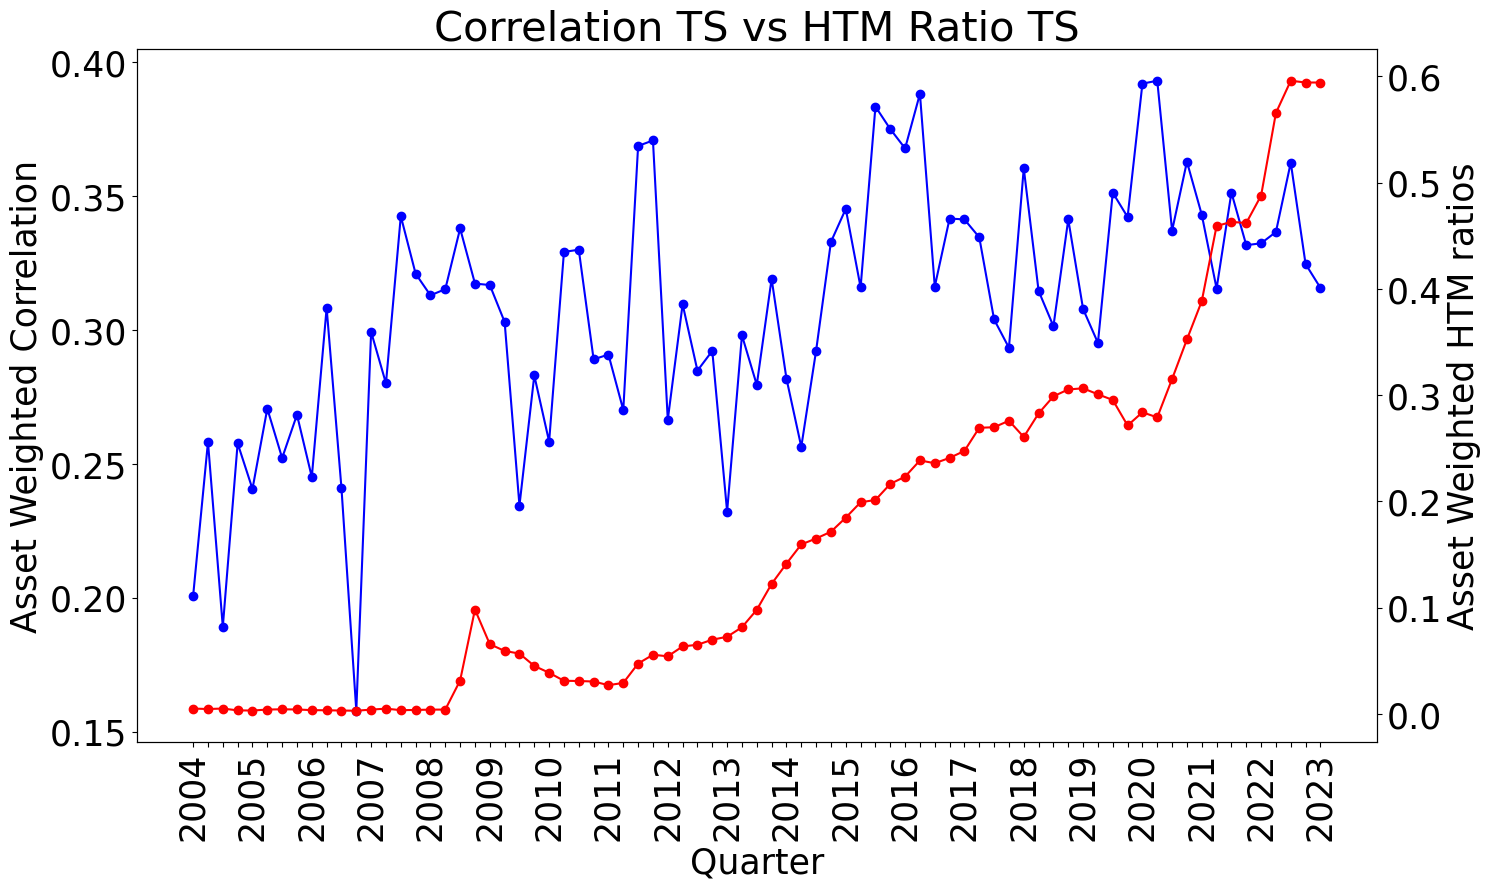

In [74]:
# Plotting
xticks = [q[:4] if "Q1" in q else " " for q in quarters]
fig, ax1 = plt.subplots()

ax1.plot(quarters, average_correlations, marker='o', label=" Correlation", color = "b")
ax1.set_xticklabels(xticks, rotation=90)
plt.title('Correlation TS vs HTM Ratio TS')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Asset Weighted Correlation')

ax2 = ax1.twinx()

ax2.plot(quarters, meanHTM, marker='o', label="Average HTM ratio", color = "r")
ax2.set_ylabel('Asset Weighted HTM ratios')
plt.show()

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.204   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.193   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     19.18   \\
\textbf{Date:}             & Sun, 03 Sep 2023 & \textbf{  Prob (F-statistic):} &  3.80e-05   \\
\textbf{Time:}             &     12:22:08     & \textbf{  Log-Likelihood:    } &    135.62   \\
\textbf{No. Observations:} &          77      & \textbf{  AIC:               } &    -267.2   \\
\textbf{Df Residuals:}     &          75      & \textbf{  BIC:               } &    -262.5   \\
\textbf{Df Model:}         &           1      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textb

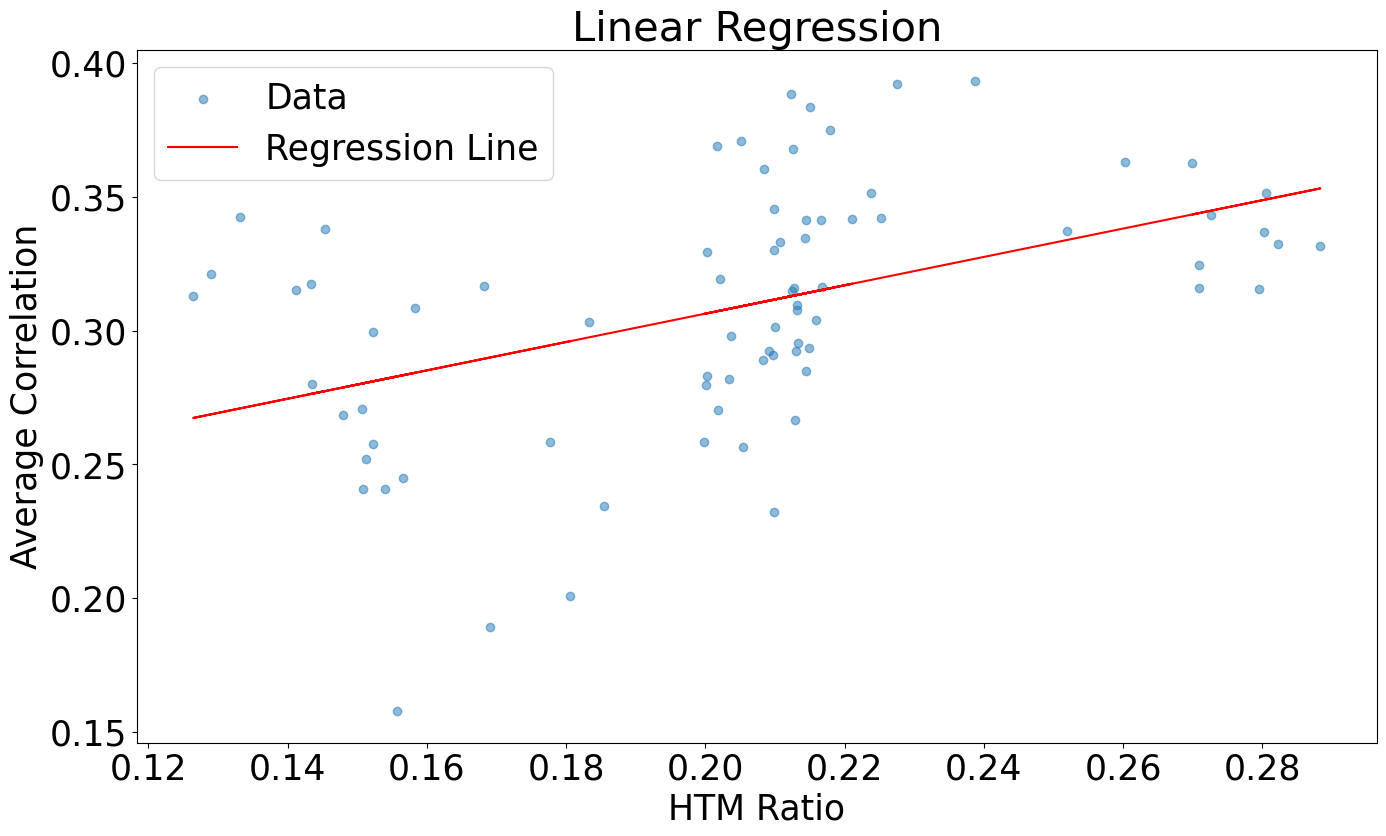

In [83]:
import statsmodels.api as sm

X = np.array(meanSecurities).reshape(-1, 1) 
y = np.array(average_correlations)
# Add a constant term for intercept to the feature matrix
X = sm.add_constant(X)

# Create a model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Get the summary report
print(results.summary().as_latex())

# Create predictions
y_pred = results.predict(X)

# Create the plot
plt.scatter(X[:, 1], y, label='Data', alpha=0.5)
plt.plot(X[:, 1], y_pred, label=f'Regression Line', color='red')
plt.xlabel('HTM Ratio')
plt.ylabel('Average Correlation')
plt.legend()
plt.title('Linear Regression')
plt.show()

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.260   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.250   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     26.36   \\
\textbf{Date:}             & Sun, 03 Sep 2023 & \textbf{  Prob (F-statistic):} &  2.16e-06   \\
\textbf{Time:}             &     12:21:45     & \textbf{  Log-Likelihood:    } &    138.45   \\
\textbf{No. Observations:} &          77      & \textbf{  AIC:               } &    -272.9   \\
\textbf{Df Residuals:}     &          75      & \textbf{  BIC:               } &    -268.2   \\
\textbf{Df Model:}         &           1      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textb

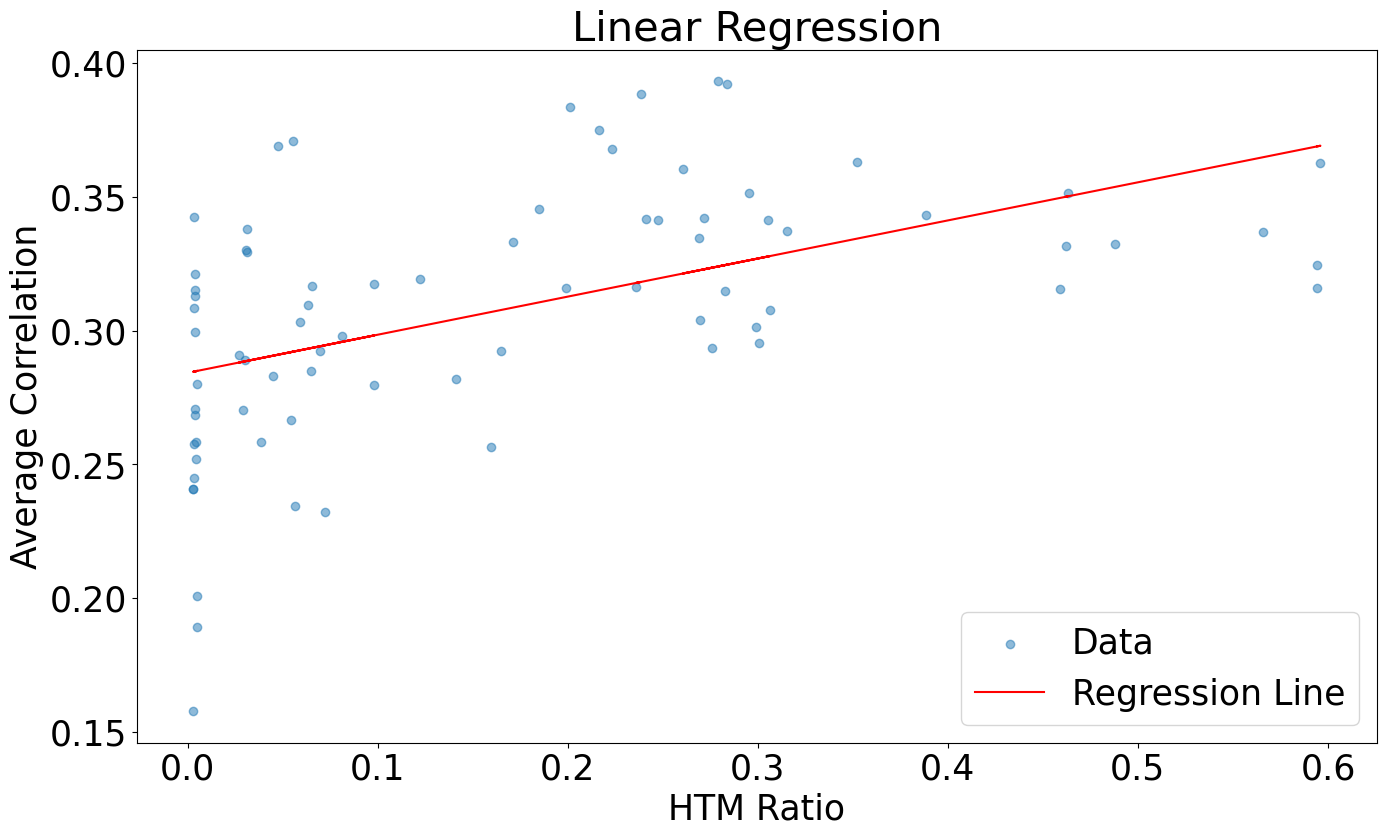

In [82]:
import statsmodels.api as sm

X = np.array(meanHTM).reshape(-1, 1) 
y = np.array(average_correlations)
# Add a constant term for intercept to the feature matrix
X = sm.add_constant(X)

# Create a model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Get the summary report
print(results.summary().as_latex())

# Create predictions
y_pred = results.predict(X)

# Create the plot
plt.scatter(X[:, 1], y, label='Data', alpha=0.5)
plt.plot(X[:, 1], y_pred, label=f'Regression Line', color='red')
plt.xlabel('HTM Ratio')
plt.ylabel('Average Correlation')
plt.legend()
plt.title('Linear Regression')
plt.show()